### Visualizing results from new sphtorus (hydro)

- sphtorus/ folder contains the run from the kengo's latest updated sphtorus.c code (based off Stone et al. 1999)
    - look at this on VisIT

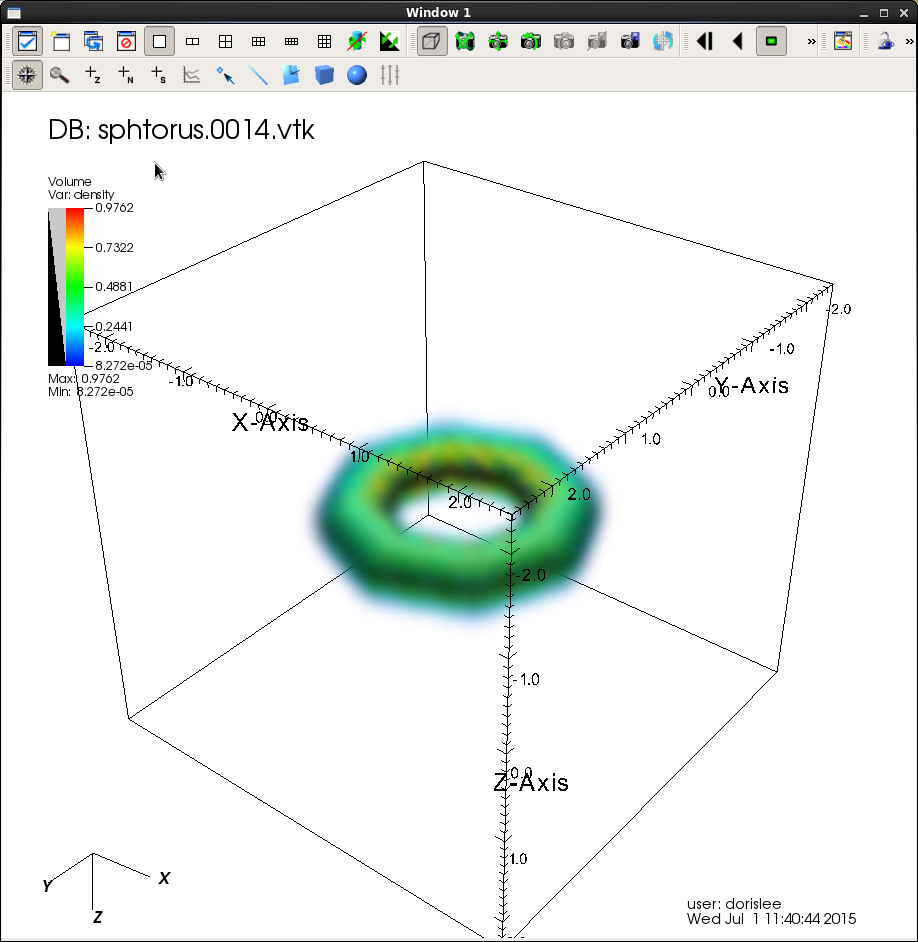

In [1]:
from IPython.display import Image
Image(filename="../../data/sphtorus_new.png",width=600)

Using a ThreeSlice on density, I see that the momentum density magnitude, total energy, and the density does not really change with time, the outermost (least dense) layer just "breathes" a bit but that might just be a numerical effect from pixellized boundary. Is this what I am supposed to see? 


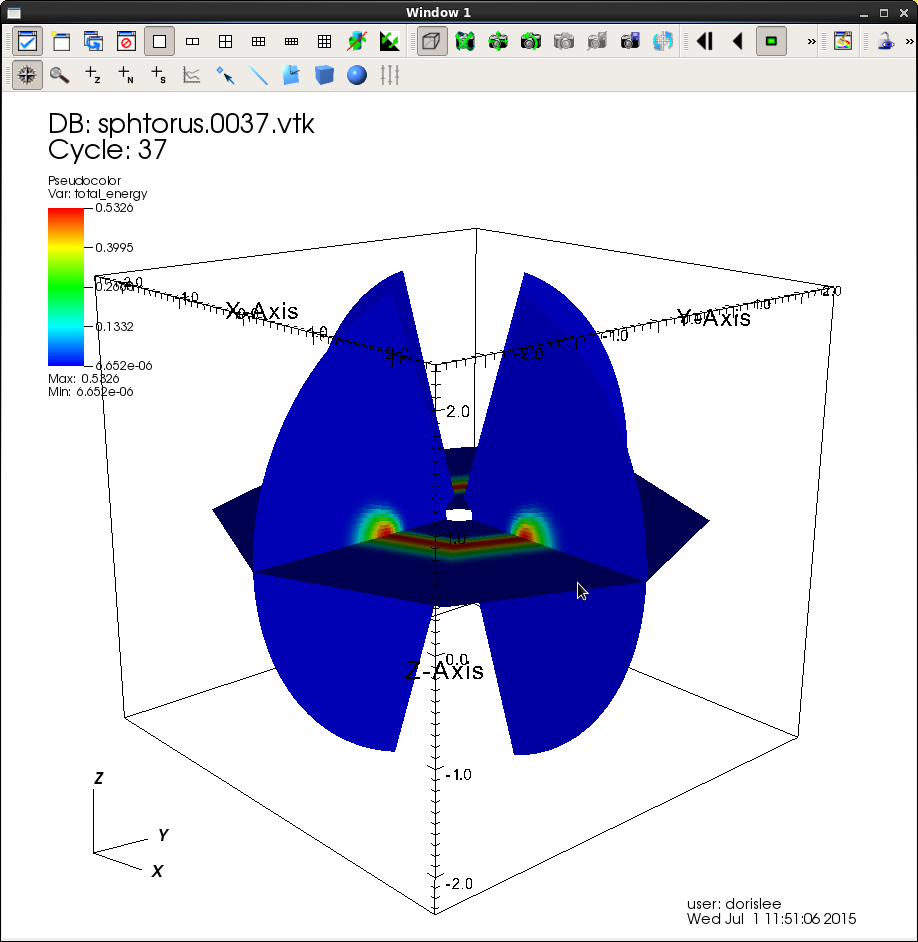

In [2]:
Image(filename="../../data/threeslice_newtorus.png",width=600)

Momentum vector fields show rotation of the torus (and non-rotating background) , p higher in regions with more stuff 

### Debugging sphPPI GGN

- fixing sphPPI GGN
    - ``./configure --with-coord=spherical --with-gas=hydro --with-integrator=vl --with-order=2p --with-problem=sphppi_ggn; make clean; make all``

```
    $ ./bin/athena  -i athinput.sphppiGGN 
Simulation started on Wed Jul  1 06:14:41 2015

Floating point exception
```

- the W.V3, W.d, W.P line is not okay (tested independently) 
- when printing out (r,$\theta$,$\phi$) why does $\phi$ not go around 0 to 6.28 even though specified so in the input file
- since q=1 , 2q-3 term is just 1
     - $h^2= a^2-(r-r_0)^2 = 25-(r-30)^2$
     - a    = 5.0                  #minor radius of torus
     - w0   =  30.0                #distance to density max
     - I am getting negative results for H2 but this is a squared quantity so it should not be squared
          - (r,theta,phi): 38.523311,2.315176,5.890486  h2: -1382.998879 
```
(r,theta,phi): 26.462672,1.208141,3.534292 
h2: 12.487311 
v3: 12.852130 
rho,p: -0.000000,0.000000 
```

- ecountering different floating point error at different timesteps? 
 ```
cycle=65 time=2.849526e-01 next dt=2.141396e-03 last dt=2.179043e-03
cycle=66 time=2.870940e-01 next dt=2.108267e-03 last dt=2.141396e-03
cycle=67 time=2.892023e-01 next dt=2.066091e-03 last dt=2.108267e-03
cycle=68 time=2.912684e-01 next dt=2.039902e-03 last dt=2.066091e-03
cycle=69 time=2.933083e-01 next dt=1.998000e-03 last dt=2.039902e-03
cycle=70 time=2.953063e-01 next dt=1.965001e-03 last dt=1.998000e-03
Floating point exception

 ```
     - not too sure why I am seeing this, changing the inner radius x1min the the input file changes when this floating point exception occurs, I think this is some math due to the point of singularity (which is exclueded out) but not sure what.

### Understanding the new sphtorus.c and writing sphppi.c code

Expect to see this kind of density as initial condition (from sphtorus.c simulation)

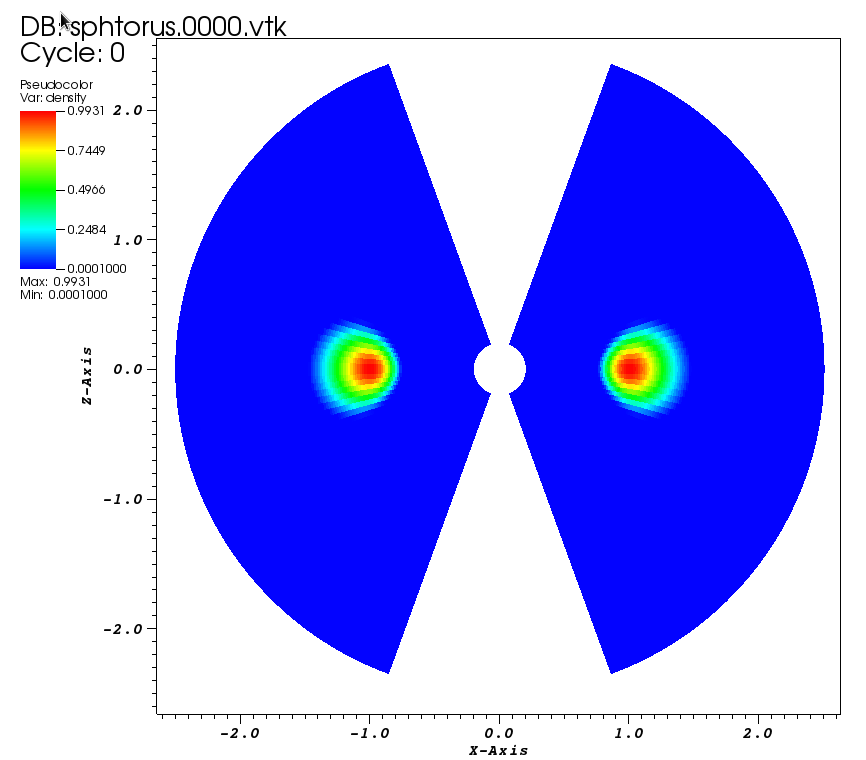

In [3]:
Image(filename="../../data/ICsphtorus.png",width=600)

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [5]:
from matplotlib.colors import LogNorm

In [8]:
G=1.
M = 1.
w0=1.
n    = 1.5                  # Compressibility (n=1.5 for adiabatic)
q    = 2                    #angular momentum  distribution
d    = 1.125              # distortion parameter

In [25]:
q=2
n = 1.5
xmax=20
ymax=20
N =1000
A =np.power((d-1)/(2*d),n)/(n+1) 
img = np.zeros((xmax,ymax))
for x in np.linspace(-1.0*(img.shape[0]-1)/2.,(img.shape[0]-1)/2.,N):
    for y in np.linspace(-1.0*(img.shape[1]-1)/2.,(img.shape[1]-1)/2.,N):
        r = np.sqrt(x**2+y**2)
        theta = np.arctan(y/x)
        #rho = G*M/((n+1)*w0*A)*(w0/r-0.5*np.power(w0/(r*sin(theta)),2)-0.5/d)
        if (r>0.1):
            rho =(1./(2.5*A)*(1/r - 0.5*(1/(r*sin (theta)))**2 - 1/3))**1.5
        else:
            rho = 0.0
        img[x+xmax/2][y+ymax/2]  =rho

/u/dorislee/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:14: RuntimeWarning: invalid value encountered in double_scalars


<matplotlib.colorbar.Colorbar instance at 0x7fc7984007a0>

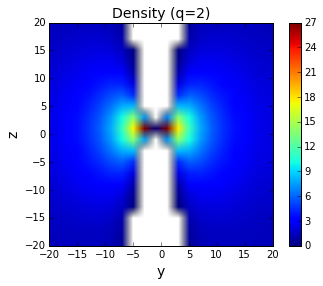

In [26]:
plt.figure()
im = plt.imshow(img)#,norm=LogNorm())#,origin="lower")
im.set_extent([-xmax,xmax,-ymax,ymax])
plt.title("Density (q={})".format(q),fontsize=14)
plt.xlabel("y",fontsize=14)
plt.ylabel("z",fontsize=14)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fc79ac27518>

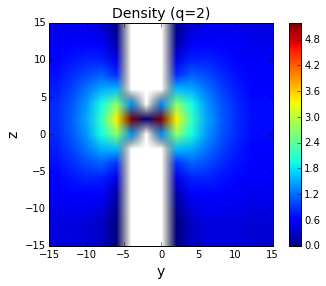

In [12]:
plt.figure()
im = plt.imshow(img)#,norm=LogNorm())#,origin="lower")
im.set_extent([-xmax,xmax,-ymax,ymax])
plt.title("Density (q={})".format(q),fontsize=14)
plt.xlabel("y",fontsize=14)
plt.ylabel("z",fontsize=14)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fc79add83b0>

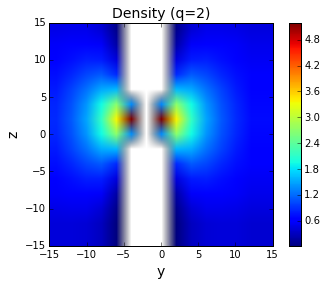

In [9]:
plt.figure()
im = plt.imshow(img)#,norm=LogNorm())#,origin="lower")
im.set_extent([-xmax,xmax,-ymax,ymax])
plt.title("Density (q={})".format(q),fontsize=14)
plt.xlabel("y",fontsize=14)
plt.ylabel("z",fontsize=14)
plt.colorbar()

Shape is right but normalization is kind of off

A is computed incorrectly

<matplotlib.colorbar.Colorbar instance at 0x7fc7982edab8>

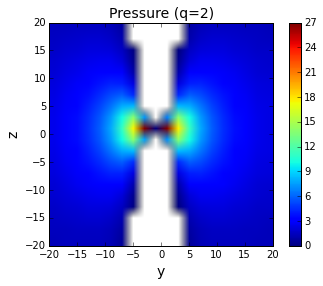

In [27]:
P = A*rho**(5./3.-1)
plt.figure()
im = plt.imshow(img)#,norm=LogNorm())#,origin="lower")
im.set_extent([-xmax,xmax,-ymax,ymax])
plt.title("Pressure (q={})".format(q),fontsize=14)
plt.xlabel("y",fontsize=14)
plt.ylabel("z",fontsize=14)
plt.colorbar()

In [9]:
q=2
n = 1.5
xmax=20
ymax=20
N =1000
A =np.power((d-1)/(2*d),n)/(n+1) 
img = np.zeros((xmax,ymax))
for x in np.linspace(-1.0*(img.shape[0]-1)/2.,(img.shape[0]-1)/2.,N):
    for y in np.linspace(-1.0*(img.shape[1]-1)/2.,(img.shape[1]-1)/2.,N):
        r = np.sqrt(x**2+y**2)
        theta = np.arctan(y/x)
        #rho = G*M/((n+1)*w0*A)*(w0/r-0.5*np.power(w0/(r*sin(theta)),2)-0.5/d)
        if (r>0.1):
            rho =r**-1
        else:
            rho = 0.0
        img[x+xmax/2][y+ymax/2]  =rho

<matplotlib.colorbar.Colorbar instance at 0x7ff567555b00>

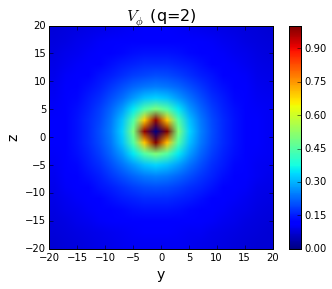

In [10]:
P = A*rho**(5./3.-1)
plt.figure()
im = plt.imshow(img)#,norm=LogNorm())#,origin="lower")
im.set_extent([-xmax,xmax,-ymax,ymax])
plt.title("$V_\phi$ (q={})".format(q),fontsize=16)
plt.xlabel("y",fontsize=14)
plt.ylabel("z",fontsize=14)
plt.colorbar()

Again the normalization is kind of off it should be non rotational $V_phi$~0 on the outside . 

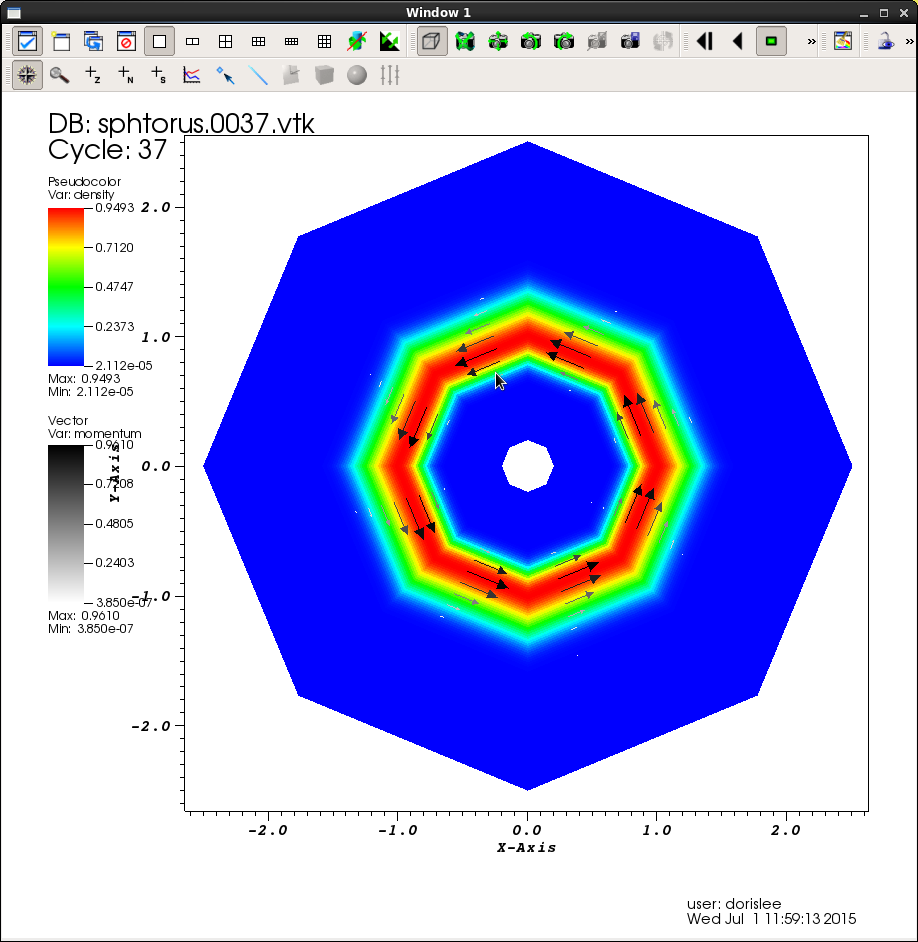

In [4]:
Image(filename="../../data/p_vector_field.png",width=600)

Can't seem to figure out why its like this. I guess I'll just put it in the simulation and see what it turns out like 

Apparently the gamma bug was because there was a conflict in namespace (math.h comes with its own gamma function called ``gamma``(see [here](http://www.gnu.org/software/gsl/manual/html_node/Gamma-Functions.html#index-gsl_005fsf_005flngamma-583) )

Another floating point error: 
   - Adding cflag debug flag and no longer use default optimization
   - ./configure --with-coord=spherical --with-gas=hydro --with-integrator=vl --with-order=2p --with-problem=sphppi --cflags=debug ; make clean; make all
   - adding this flag still yield the same unhelpful debugging message. 

- not sure why the program insist that I enter in gamma parameter even though i dont par_getd it inside the code

- Its okay if I do 
        
    printf("v3: %2f",omega0*pow(r,1-q));
    
    but then set W.V3 = 1.0 or somethingn
    
    but not okay if I set W.V3 = omega0*pow(r,1-q); directly??
    - so this is just very weird for v3

Now if I look at $\rho$ and $P$ and set a restriction on keeping only real solutions of $\rho$ so now all the numerical values are correct, but I still have trouble stuffing them into W.d, W.V3...etc 

In [9]:
A =np.power((d-1)/(2*d),n)/(n+1) 

In [22]:
(np.where(z!=nan)and np.where(z!=inf))[0]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
import math
np.where(np.isnan(z))[0]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
from scipy.interpolate import interp1d
from scipy.ndimage import map_coordinates


def polar2cartesian(r, t, grid, x, y, order=3):

    X, Y = np.meshgrid(x, y)

    new_r = np.sqrt(X*X+Y*Y)
    new_t = np.arctan2(X, Y)

    ir = interp1d(r, np.arange(len(r)), bounds_error=False)
    it = interp1d(t, np.arange(len(t)))

    new_ir = ir(new_r.ravel())
    new_it = it(new_t.ravel())

    new_ir[new_r.ravel() > r.max()] = len(r)-1
    new_ir[new_r.ravel() < r.min()] = 0

    return map_coordinates(grid, np.array([new_ir, new_it]),
                            order=order).reshape(new_r.shape)

# Define original polar grid

nr = 10
nt = 10

r = np.linspace(1, 100, nr)
t = np.linspace(0., np.pi, nt)
#z = np.random.random((nr, nt))
z =(1./(2.5*A)*(1/r - 0.5*(1/(r*sin (t)))**2 - 1./3.))**1.5

# Define new cartesian grid

nx = 100
ny = 200

x = np.linspace(0., 100., nx)
y = np.linspace(-100., 100., ny)

# Interpolate polar grid to cartesian grid (nearest neighbor)

fig = plt.figure()
plt.imshow(polar2cartesian(r, t, z, x, y, order=0), interpolation='nearest')

# Interpolate polar grid to cartesian grid (cubic spline)

fig = plt.figure()
plt.imshow(polar2cartesian(r, t, z, x, y, order=3), interpolation='nearest')

/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: divide by zero encountered in divide
/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/IPython/kernel/__main__.py:32: RuntimeWarning: invalid value encountered in power


RuntimeError: invalid shape for coordinate array

In [ ]:
a